In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = heart_disease.drop(["target"], axis=1)
y = heart_disease["target"]

In [4]:
from  sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (242, 13)
X_test shape: (61, 13)
y_train shape: (242,)
y_test shape: (61,)


In [6]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)


In [7]:
# Evaluate the fitted model on the trainning set using the score method
print(f"Train score: {clf.score(X_train, y_train)}")

Train score: 1.0


In [8]:
print(f"Test score: {clf.score(X_test, y_test)}")

Test score: 0.8360655737704918


In [9]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [10]:
models = {
    "LinealSVC": LinearSVC(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100)
}

results = {}

In [11]:
np.random.seed(42)

for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = model.score(X_test, y_test)

results

/home/nicolas/Develop/Trainning/ZTM/ML-DS/sample_project/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/nicolas/Develop/Trainning/ZTM/ML-DS/sample_project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinealSVC': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'SVC': 0.7049180327868853,
 'LogisticRegression': 0.8852459016393442,
 'RandomForestClassifier': 0.8360655737704918}

<AxesSubplot:>

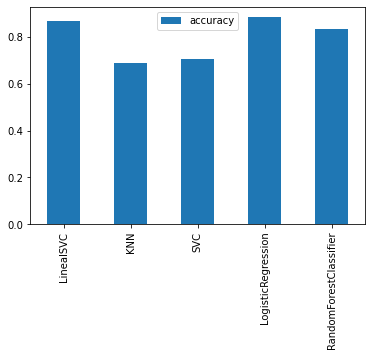

In [12]:
results_df = pd.DataFrame(results.values(), results.keys(), columns=["accuracy"])

results_df.plot(kind="bar")

In [13]:
# Different logistic regression parameters
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

In [15]:
np.random.seed(42)

from sklearn.model_selection import RandomizedSearchCV

rs_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_grid, cv=5, n_iter=5, verbose=1)

rs_log_reg.fit(X, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=1)

In [16]:
rs_log_reg.best_estimator_

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [18]:
lg = LogisticRegression(C=0.23357214690901212, solver='liblinear')
lg.fit(X_train, y_train)

lg.score(X_test, y_test)

0.8852459016393442

In [19]:
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import plot_roc_curve

In [21]:
y_preds = clf.predict(X_test)

In [22]:
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]])

In [23]:
pd.crosstab(y_test, y_preds, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,25,4
1,3,29


<AxesSubplot:>

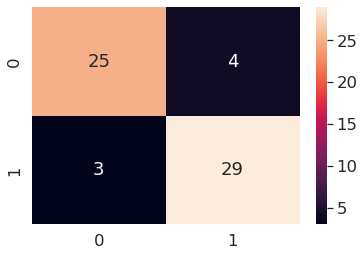

In [25]:
import seaborn as sns

sns.set(font_scale=1.5)
conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat, annot=True, fmt="d")

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [28]:
precision_score(y_test, y_preds)

0.8787878787878788

In [29]:
from sklearn.metrics import recall_score
recall_score(y_test, y_preds)

0.90625

In [30]:
from sklearn.metrics import f1_score
f1_score(y_test, y_preds)

0.8923076923076922

/home/nicolas/Develop/Trainning/ZTM/ML-DS/sample_project/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


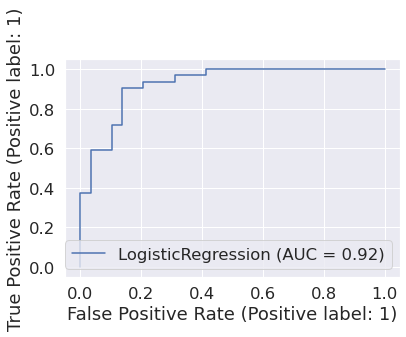

In [32]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf, X_test, y_test)

In [42]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X, y, cv=5, scoring="accuracy")

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [43]:
cross_val_acc = np.mean(cross_val_score(clf, X, y, cv=5, scoring="accuracy"))
cross_val_acc


0.8479781420765027

In [44]:
cross_val_prec = np.mean(cross_val_score(clf, X, y, cv=5, scoring="precision"))
cross_val_prec



0.8215873015873015

In [45]:
cross_val_recall = np.mean(cross_val_score(clf, X, y, cv=5, scoring="recall"))
cross_val_recall

0.9272727272727274

In [46]:
cross_val_f1 = np.mean(cross_val_score(clf, X, y, cv=5, scoring="f1"))
cross_val_f1

0.8705403543192143

In [47]:
from joblib import dump, load

dump(clf, "heart_disease_model.joblib")

['heart_disease_model.joblib']

In [48]:
clf_loaded = load("heart_disease_model.joblib")

clf_loaded.score(X_test, y_test)

0.8852459016393442

In [49]:
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [51]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [52]:
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [53]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [55]:
car_sales.dropna(inplace=True, subset=["Price"])

In [56]:
car_sales.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [58]:
categorical_features = ["Make", "Colour"]

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [67]:
door_features = ["Doors"]

door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

In [60]:
numeric_features = ["Odometer (KM)"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))])


In [69]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_features),
        ("num", numeric_transformer, numeric_features)
    ]
)

In [62]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

regression_models = {
    "Ridge": Ridge(),
    "SVR_linear": SVR(kernel="linear"),
    "SVR_rbf": SVR(kernel="rbf"),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100)
}

regression_results = {}

In [63]:
car_sales_X = car_sales.drop(["Price"], axis=1)
car_sales_y = car_sales["Price"]

In [65]:
car_sales_X_train, car_sales_X_test, car_sales_y_train, car_sales_y_test = train_test_split(car_sales_X, car_sales_y, test_size=0.2, random_state=42)

print(f"car_sales_X_train: {car_sales_X_train.shape}")
print(f"car_sales_X_test: {car_sales_X_test.shape}")
print(f"car_sales_y_train: {car_sales_y_train.shape}")
print(f"car_sales_y_test: {car_sales_y_test.shape}")


car_sales_X_train: (760, 4)
car_sales_X_test: (190, 4)
car_sales_y_train: (760,)
car_sales_y_test: (190,)


In [70]:
for model_name, model in regression_models.items():
    model_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regression", model)])
    print(f"Fitting {model_name}...")
    model_pipeline.fit(car_sales_X_train, car_sales_y_train)

    print(f"Scoring {model_name}...")
    regression_results[model_name] = model_pipeline.score(car_sales_X_test, car_sales_y_test)

Fitting Ridge...
Scoring Ridge...
Fitting SVR_linear...
Scoring SVR_linear...
Fitting SVR_rbf...
Scoring SVR_rbf...
Fitting RandomForestRegressor...
Scoring RandomForestRegressor...


In [71]:
print(regression_results)

{'Ridge': 0.254026110579439, 'SVR_linear': -0.489452821008145, 'SVR_rbf': 0.0018546241516633755, 'RandomForestRegressor': 0.22636292675383307}


In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [73]:
ridge_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", Ridge())])

ridge_pipeline.fit(car_sales_X_train, car_sales_y_train)

car_y_preds = ridge_pipeline.predict(car_sales_X_test)

car_y_preds[:50]

array([18514.480873  , 22204.86580267, 11045.72092225,  6891.87687957,
        8793.93970278, 10926.96786577, 15267.76229871, 13834.80312146,
       20207.44377898, 14412.59968701,  6216.01228306, 16543.06707068,
       11783.69374936, 13492.13284255, 14321.17899086, 16425.45131776,
       15999.88230172,  9925.04252351, 11576.64865889, 11580.55130633,
       10647.22402588, 13113.54464064, 17874.90033257, 23447.29246732,
       11797.33019118, 14481.85336505, 18430.527126  , 14680.33044208,
       20585.63901269, 19953.91395769, 18163.1170151 , 22366.43390174,
       12435.69707467, 14265.25495748, 18351.62656383, 19564.58267503,
       12213.05747919, 12479.20772529, 18677.93478691, 11284.89072638,
       15278.54001605, 17378.81425165, 19247.77623181, 17343.90692672,
       15048.12797569, 12724.44477165, 12389.86021752,  8475.63778401,
       15255.49324105, 18602.79970861])

In [75]:
mse = mean_squared_error(car_sales_y_test, car_y_preds)
mse

49950182.63337458

In [77]:
mae = mean_absolute_error(car_sales_y_test, car_y_preds)
mae

5713.8215208551555

In [78]:
r2 = r2_score(car_sales_y_test, car_y_preds)
r2

0.254026110579439